In [1]:
import numpy as np
import pandas as pd

In [56]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [16]:
# train test split
x = df.iloc[:, 1:]
y = df.iloc[:, 0]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<Figure size 1200x1000 with 0 Axes>

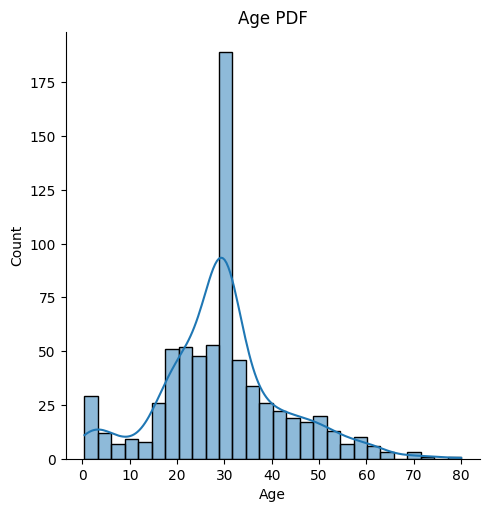

In [48]:

plt.figure(figsize=(12,10))
# plt.subplot(1,2,1)
sns.displot(x_train['Age'], kde=True)
plt.title('Age PDF')

# plt.subplot(1,2,2)
# stats.probplot(x_train['Age'], dist='norm', plot=plt)
# plt.title('QQ plot')

plt.show()

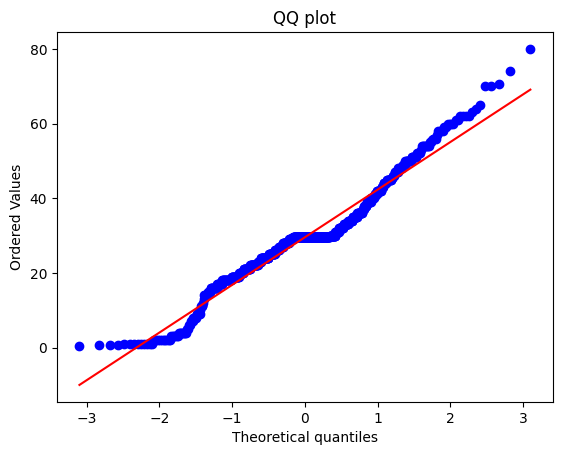

In [49]:
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('QQ plot')

plt.show()

In [50]:
# defining model objs
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

## without applying functional transformer

In [54]:
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

clf1.fit(x_train, y_train)
pred1 = clf1.predict(x_test)

In [55]:
print("LR", accuracy_score(y_test, pred))
print("DT", accuracy_score(y_test, pred1))

LR 0.6480446927374302
DT 0.659217877094972


## with functional transformer - log transformer

In [57]:
trf = FunctionTransformer(func=np.log1p)

In [58]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [74]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
prediction = clf.predict(x_test)

clf1.fit(x_train_transformed, y_train)
prediction1 = clf1.predict(x_test)

In [75]:
print("Accuracy LR", accuracy_score(y_test, prediction))
print("Accuracy DT", accuracy_score(y_test, prediction1))

Accuracy LR 0.7374301675977654
Accuracy DT 0.5865921787709497


# Cross verify

In [78]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

lr = np.mean(cross_val_score(estimator=clf, X=x_train, y=y_train, scoring='accuracy', cv=10))
dt = np.mean(cross_val_score(estimator=clf1, X=x_train, y=y_train, scoring='accuracy', cv=10))

print("Accuracy LR", lr)
print("Accuracy DT", dt)

Accuracy LR 0.6557902973395932
Accuracy DT 0.610935054773083


# applying func trans only on fare

In [80]:
tnf = ColumnTransformer([
    ('fare_log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')

In [83]:
x_train_transformed2 = tnf.fit_transform(x_train)
x_test_transformed2 = tnf.transform(x_test)

In [85]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2, y_train)
clf2.fit(x_train_transformed2, y_train)

pred = clf.predict(x_test_transformed2)
pred2 = clf2.predict(x_test_transformed2)

print("Accuracy LR", accuracy_score(y_test, pred))
print("Accuracy DT", accuracy_score(y_test, pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6815642458100558


In [86]:
# cross validate

lr = np.mean(cross_val_score(estimator=clf, X=x_train_transformed2, y=y_train, scoring='accuracy', cv=10))
dt = np.mean(cross_val_score(estimator=clf2, X=x_train_transformed2, y=y_train, scoring='accuracy', cv=10))

print(lr)
print(dt)

0.6572378716744913
0.615160406885759
